# Graphs and Adjacency Matrices
The code below will print out all the graphs and adjacency matrices.

In [1]:
#Code used to generate graphs and adjacency matrices

import numpy as np
import itertools
import networkx as nx #
import matplotlib.pyplot as plt
import math

#function 1
def is_valid_graph(adj_matrix):
    n = len(adj_matrix)
    # Check if the matrix is symmetric
    if any(adj_matrix[i][j] != adj_matrix[j][i] for i in range(n) for j in range(n)):
        return False
    # Check if the diagonal elements are all zeros
    if any(adj_matrix[i][i] != 0 for i in range(n)):
        return False
    return True

#function 2
def draw_graph(adj_matrix):
    # Create an empty graph
    G = nx.Graph()
    # Add nodes
    G.add_nodes_from(range(n))
    # Add edges
    for i in range(n):
        for j in range(i+1, n):
            if adj_matrix[i][j] == 1:
                G.add_edge(i, j)
            

    # Print the graph
    print("Graph:")
    print(G.edges())

    if n == 1:
        pos = {0:(0.5,0.5)}
    elif n ==2:
        pos = {0:(0,1), 1:(1,1)}
        colour = 'green'
    elif n == 3:
        pos = {0:(0,1) , 1:(1,1), 2:(0,0)}
        colour = 'blue'
    elif n ==4:
        pos = {0:(0,1) , 1:(1,1), 2:(0,0) , 3:(1,0)}
        colour = 'red'
    elif n == 5:
        pos = {0:(0,1) , 1:(1,1), 2:(0,0) , 3:(1,0), 4:(0.5, 1+ math.sqrt(4/5))}
        colour = 'black'

    # Visualize the graph
    nx.draw(G, pos , edge_color = colour, width = 3,with_labels=True)
    plt.title("Graph Visualization")

    plt.savefig(f'graph1111_{adj_matrix}')
    plt.show()
    plt.clf()
            
    print()
    
    return 
    
#function 3
def generate_all_graphs(n):
    count = 0
    # Generate all possible binary matrices of size n x n
    binary_matrices = itertools.product([0, 1], repeat=n*n)
    all_matrices = [] # list to store the valid matrices.
    
    for matrix in binary_matrices:
        
        
        # Reshape the binary matrix into a square matrix
        adj_matrix = [matrix[i:i+n] for i in range(0, len(matrix), n)]
        
        # Check if the matrix represents a valid graph
        if is_valid_graph(adj_matrix):
            count += 1
            print(adj_matrix)
            #store the adjacency matrix in a list.
            all_matrices.append(adj_matrix)
            
            graphs = draw_graph(adj_matrix)
            print()
       
    return count,all_matrices

[(0, 0, 0), (0, 0, 0), (0, 0, 0)]
Graph:
[]


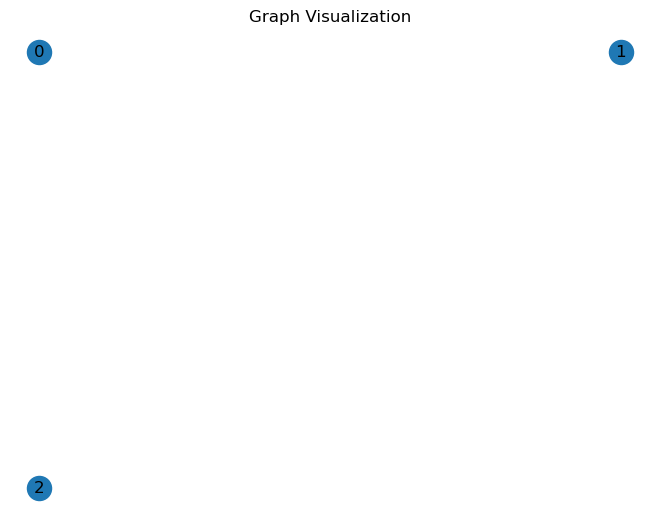



[(0, 0, 0), (0, 0, 1), (0, 1, 0)]
Graph:
[(1, 2)]


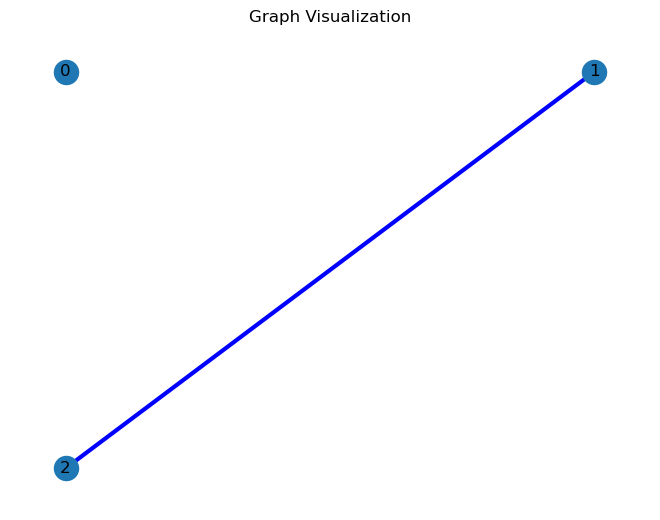



[(0, 0, 1), (0, 0, 0), (1, 0, 0)]
Graph:
[(0, 2)]


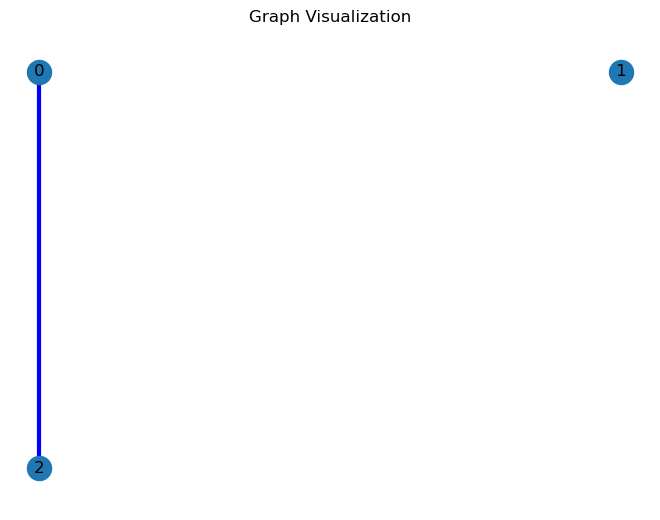



[(0, 0, 1), (0, 0, 1), (1, 1, 0)]
Graph:
[(0, 2), (1, 2)]


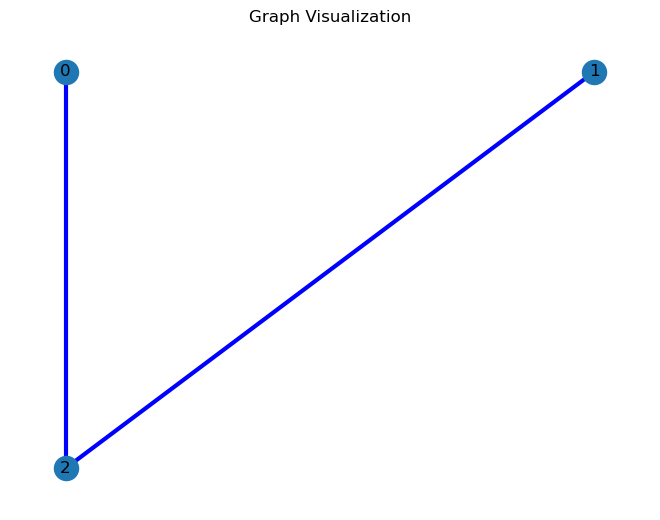



[(0, 1, 0), (1, 0, 0), (0, 0, 0)]
Graph:
[(0, 1)]


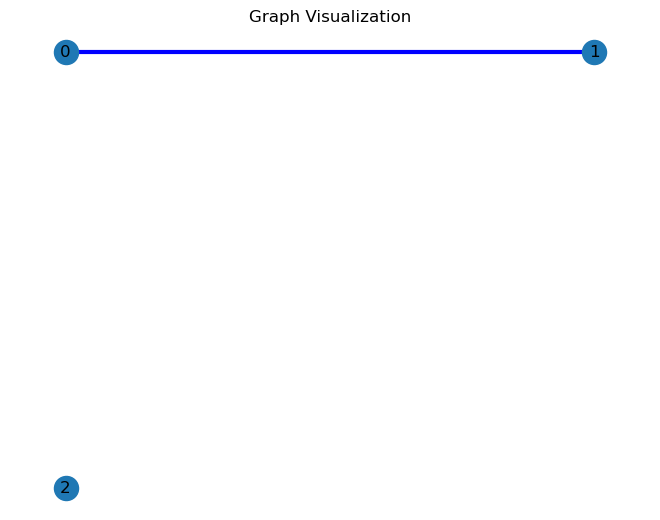



[(0, 1, 0), (1, 0, 1), (0, 1, 0)]
Graph:
[(0, 1), (1, 2)]


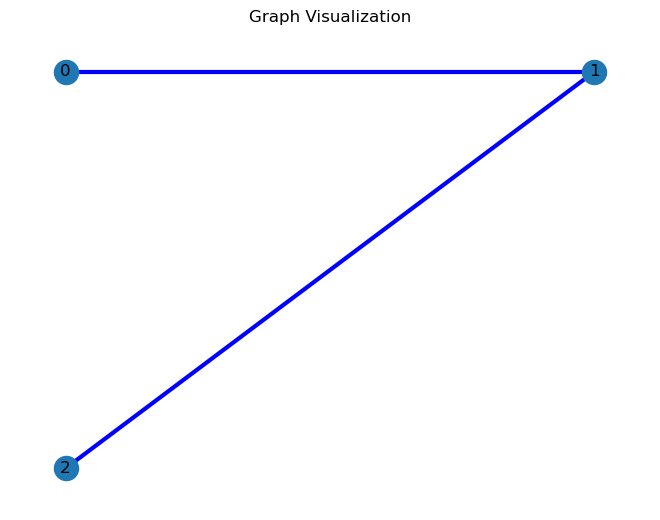



[(0, 1, 1), (1, 0, 0), (1, 0, 0)]
Graph:
[(0, 1), (0, 2)]


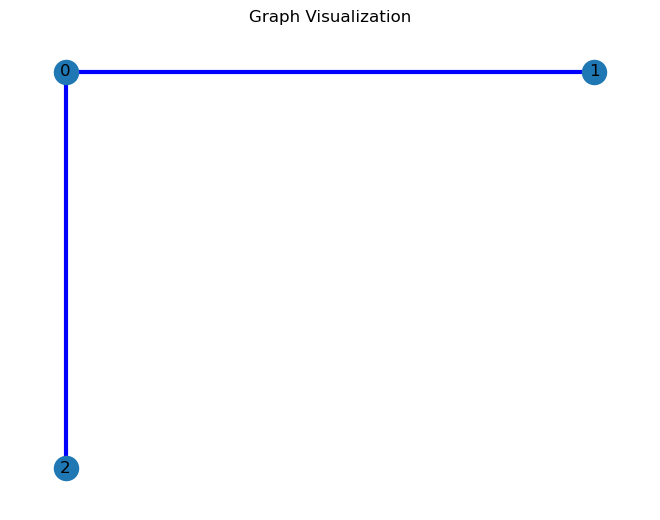



[(0, 1, 1), (1, 0, 1), (1, 1, 0)]
Graph:
[(0, 1), (0, 2), (1, 2)]


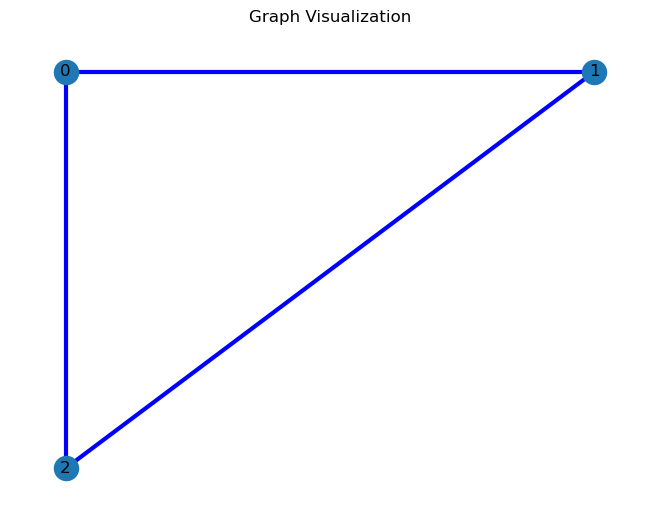



Total number of graphs: 8
[[(0, 0, 0), (0, 0, 0), (0, 0, 0)], [(0, 0, 0), (0, 0, 1), (0, 1, 0)], [(0, 0, 1), (0, 0, 0), (1, 0, 0)], [(0, 0, 1), (0, 0, 1), (1, 1, 0)], [(0, 1, 0), (1, 0, 0), (0, 0, 0)], [(0, 1, 0), (1, 0, 1), (0, 1, 0)], [(0, 1, 1), (1, 0, 0), (1, 0, 0)], [(0, 1, 1), (1, 0, 1), (1, 1, 0)]]


<Figure size 640x480 with 0 Axes>

In [2]:
#Test it out
# Define the size of the graphs
n = 3  # Change this value to the desired size

# Generate and print all possible graphs of size n
num_graphs = generate_all_graphs(n)

print("Total number of graphs:", num_graphs[0])
all_matrices =  num_graphs[1]
print(all_matrices)

# Homomorphic Graphs
The code below should group together all homomorphic graphs and print out 1 graph as a representative of each group.

In [7]:
#to find the homomorphic graphs
import numpy as np
from collections import defaultdict

#function 1
def degree(matrix):    #to determine the degree on each vertex in a matrix
    matrix = np.array(matrix)
    n = len(matrix)  # Number of rows
    counts = []
    
    for i in range(n):
        ones_count = np.sum(matrix[i, :] == 1)
        zeros_count = np.sum(matrix[i, :] == 0)
        counts.append((zeros_count, ones_count))
    
    return tuple(counts)

#function 2 - ***
def ones_per_row(matrix): #Another way to find the 'degree' of a vertex
    return [row.count(1) for row in matrix]
    
#function 3 - ***
def group_matrices_by_ones(matrices): #regardless of row order group the matrices, according to ones per row.
    groups = defaultdict(list)
    
    for matrix in matrices:
        ones_count = ones_per_row(matrix)
        ones_count_sorted = tuple(sorted(ones_count))
        groups[ones_count_sorted].append(matrix)

    nnn = len(groups)
    return groups, nnn

#function 4
def z1(matrix):     #count all the ones in the matrix, count all the zeros in the matrix
    matrix = np.array(matrix)
    count =[]
    oone = np.sum(matrix == 1)
    zzero = np.sum(matrix == 0)
    count.append((zzero,oone))
    
    return tuple(count)

#function 5
def group_z1(adj_matrices):     #to group according to just ones and zeros
    
    grouped_matrices = defaultdict(list) #creating an empty list
    
    for matrix in adj_matrices:
        counts = z1(matrix)                        
        grouped_matrices[counts].append(matrix)
        
    grouped_matrices = dict(grouped_matrices)
    nnn = len(grouped_matrices)

    return grouped_matrices,nnn

# f    grouped = defaultdict(list)
# 
    # for matrix in adj_mat:
        # counts = degree(adj_mat)
        # grouped_mat[counts].append(adj_mat)

    # grouped = 

    # nnn = len(grouped)
    # return grouped, nnn

In [17]:
#Test it out
grouped, number_of_grps = group_matrices_by_ones(all_matrices)

print(f'We can expect {number_of_grps} groups of graphs.')
print()

#print groups of adjacency matrices

# nnn = len(all_matrices)
# for k in range(nnn): 
#     matrix = all_matrices[k]  
#     a = draw_graph(matrix)
#     print(a)

for key, group in grouped.items():
    print(f"Group {key}:")
    for matrix in grouped:
        for row in matrix:
            print(row)
            print()  # Separate matrices within the group for readability
    print("=" * 40)  # Separate groups for readability

We can expect 4 groups of graphs.

Group (0, 0, 0):
0

0

0

0

1

1

1

1

2

2

2

2

Group (0, 1, 1):
0

0

0

0

1

1

1

1

2

2

2

2

Group (1, 1, 2):
0

0

0

0

1

1

1

1

2

2

2

2

Group (2, 2, 2):
0

0

0

0

1

1

1

1

2

2

2

2



# Count the K-cliques in the graph

In [ ]:
#To find the k-cliques and l-indep sets

def rams(k,l):
    #add up the number of 1's and zeros above the main diagonal each row
    ones_count = [0] * n
    zeros_count = [0] * n

    #by adding the number of ones and zeros we could maybe find the degree of each vertex and then the cliques..
    
    for i in range(n):
        for j in range(n):
            if matrix[i][j] == 1:
                ones_count[i] +=1
            elif matrix[i][j] == 0 and i != j: #leave out the diagonal
                zeros[i] +=1
    
    # compare the elements of ones to find k
    
    
    # compare the elements of zeros to find l
    
    
    return N

# Other
### For now

In [ ]:
#or try and produce the list of connected verticies and then make a cycle, then determie how many of thoes 
#edges there are to find the clique of (n-1)

def ramms(k,l):
    
    
    return N

In [ ]:
    # Iterate through the matrix above the main diagonal
    for i in range(n): #go through each row
        for j in range(i + 1, n): # go through each element left of the diagonal
            if matrix[i][j] == 1:
                ones_count[i] += 1
            elif matrix[i][j] == 0:
                zeros_count[i] += 1

In [ ]:
    # Iterate through the matrix above the main diagonal
    for i in range(n): #go through each row
        for j in range(i + 1, n): # go through each element left of the diagonal
            if matrix[i][j] == 1:
                ones_count[i] += 1
            elif matrix[i][j] == 0:
                zeros_count[i] += 1

In [ ]:
G = nx.Graph()
G.add_nodes_from([1,2,3])
print(G)

In [ ]:
def row_counts(matrix):
    # Convert the input list of lists to a NumPy array
    matrix = np.array(matrix)
    n = len(matrix)  # Number of rows
    counts = []
    
    for i in range(n):
        ones_count = np.sum(matrix[i, :] == 1)
        zeros_count = np.sum(matrix[i, :] == 0)
        counts.append((ones_count, zeros_count))
    
    return tuple(counts)

A = [[0,1,1,0],[1,0,0,1],[0,0,0,0],[1,1,1,0]]
b = row_counts(A)
print(b)